# Introduction

As a machine learning research scientist, our goal is to solve the unseen problem by designing some algorithms. Therefore, an well defined end to end pipeline is always expected. This pipeline is also known as **Prototyping** 

In order to build such pipelines, we need to first understand our problem, this is often called **Exploration Data Analysis** (EDA). 

In this notebook, we will show how to run an EDA on one ongoing kaggle competition called **Happywhale** https://www.kaggle.com/c/happy-whale-and-dolphin/overview

You might play with this sample code and come up with your own idea on how to tackle the problem (or getting a medal by the end of this competition)

Couple baselines will be provided as the course progress. You might also build upon on such baselines. The competition ends in April so you will know your competition result before the end of this class :)


## Importing packages

In [12]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

Let's define the path, please note that you will need to figure out your own system path. If you have issue for this step, please contact TA or simply ask your classmates. 

## If you are running on kaggle notebook, skip this cell

If you are running this code on your own instance (not with kaggle notebooks, you will need to download the competition data to your own environment)

One simple way to download the data is by using kaggle command line tools, here is a simple tutorial. **Please note that you must have your kaggle account registered and accept the rules of the HappyWhale competition in order to download the data to your own instance**

1. Click your kaggle profile and select account, under the API section, click generate new API token. Your kaggle API token will copy to your clipborad

2. run pip install kaggle

3. Navigate to your root directory /.kaggle, and create a kaggle.json file and paste step 1 token. Simply save the kaggle.json file

4. run kaggle competitions download -c happy-whale-and-dolphin

In [7]:
PATH = '/home/haohe/kaggle/whale'
train_data = PATH + '/data/raw_data/train_images'
test_data = PATH + '/data/raw_data/test_images'

In [8]:
df_train = pd.read_csv(PATH + '/data/raw_data/train.csv')
df_test = pd.read_csv(PATH + '/data/raw_data/sample_submission.csv')

Now, let's take a look of our training data

In [9]:
df_train.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In this competition, we are giving a set of images, each of the images either belongs to a Whale class or Dolphin class. You can see this information in the **species** column. In addition, each of the whale of dolphin is provided a **individual_id**. The goal of this competition is when giving a image, you would need to predict its **individual_id**, if you think you never seen this image before, you will need to predict it as a **new_individual**

In [10]:
df_test.head()

,image,predictions
0,000110707af0ba.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
1,0006287ec424cb.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
2,000809ecb2ccad.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
3,00098d1376dab2.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
4,000b8d89c738bd.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...


## Metric

Once we have a basic understanding of the data, the next step is to under stand the evaluation metric. In this competiton, the evaluation metric is simple. If calculates top_5 MAP, 

$ 𝑀𝐴𝑃@5=\frac{1}{𝑈}\sum_{𝑢=1}^{𝑈}\sum_{𝑘=1}^{𝑚𝑖𝑛(𝑛,5)}𝑃(𝑘)×𝑟𝑒𝑙(𝑘) $

where U is the number of images, P(k) is the precision at cutoff k, n is the number predicitions per image, and rel(k) is an indicator function equaling 1 if the item at rank k is a relevent (correct) label, zero otherwise.

For more information, please refer to competition page

If will be interesting to implement this MAP@5 as a side homework as later your will need to check your model performance

## EDA - a simple baseline

We now know the goal is to predict individual_id, we can instantly narrow down the research area to image classification, RE-ID. Let's take a look of our data distribution.

In [13]:
len(df_train), len(df_test)

(51033, 27956)

Which means we have 51k training images and 27k test images. Let's take a look of the training images first

In [14]:
df_train['species'].unique(),len(df_train['species'].unique())

(array(['melon_headed_whale', 'humpback_whale', 'false_killer_whale',
        'bottlenose_dolphin', 'beluga', 'minke_whale', 'fin_whale',
        'blue_whale', 'gray_whale', 'southern_right_whale',
        'common_dolphin', 'kiler_whale', 'pilot_whale', 'dusky_dolphin',
        'killer_whale', 'long_finned_pilot_whale', 'sei_whale',
        'spinner_dolphin', 'bottlenose_dolpin', 'cuviers_beaked_whale',
        'spotted_dolphin', 'globis', 'brydes_whale', 'commersons_dolphin',
        'white_sided_dolphin', 'short_finned_pilot_whale',
        'rough_toothed_dolphin', 'pantropic_spotted_dolphin',
        'pygmy_killer_whale', 'frasiers_dolphin'], dtype=object),
 30)

Seems like we have **30** different species. 

Have you heard about people often talking about cleanning the data? Here you can see a great example. Did you notice that **killer_whale** and **kiler_whale**, also, **bottlenose_dolphin** and **bottlenose_dolpin**? Are they two different classes or just a typo?

Let's also take a look how many are they

In [15]:
df_train[df_train['species']=='kiler_whale']

,image,species,individual_id
32,0030835e895969.jpg,kiler_whale,1816cc1ae38b
204,01308e45bf22d3.jpg,kiler_whale,c2b64ccd2f88
292,0199c4cb8fd996.jpg,kiler_whale,5237b2a5ea5e
353,01f2bafef54906.jpg,kiler_whale,4ca2d1704064
398,022d361f2d7f7a.jpg,kiler_whale,e875783a423b
...,...,...,...
50836,ff11a2a78f75e9.jpg,kiler_whale,5137800a3ef7
50927,ff7aa717a36855.jpg,kiler_whale,4d44651c308a
50963,ffa54f1754fbb1.jpg,kiler_whale,caee7717cf57
51000,ffcf370369d9d3.jpg,kiler_whale,3721912d310c


In [16]:
df_train[df_train['species'] == 'bottlenose_dolpin']


,image,species,individual_id
83,007991a750a4f2.jpg,bottlenose_dolpin,356b1b0ece97
108,00a4745e7218c4.jpg,bottlenose_dolpin,3b5cd491b73f
179,010cb3070c237e.jpg,bottlenose_dolpin,c63c9eb5dde3
202,012c710965bd74.jpg,bottlenose_dolpin,932a85030add
220,01478f3794e3d7.jpg,bottlenose_dolpin,476a11b38d17
...,...,...,...
50879,ff3a8a5500bcae.jpg,bottlenose_dolpin,c727ddcb913a
50882,ff3e1d516e7eb2.jpg,bottlenose_dolpin,6c0195390308
50906,ff5cad7a5b15a0.jpg,bottlenose_dolpin,7217a2f5b150
50971,ffac684ba0e92e.jpg,bottlenose_dolpin,811dcd23d4c8


**Any suggestions of how to handle such data?**

One suggestion is we don't touch it until we have further understanding, such as merge them to the original class, but you have to pay attention to overlaps

Now let's add two more class label to the data, one for overall whale class and the other for dolphin

In [25]:
df_train.loc[df_train['species'].str.contains('beluga'), 'species'] = 'beluga_whale'
df_train.loc[df_train['species'].str.contains('globis'), 'species'] = 'globis_whale'

In [26]:
df_train['class'] = df_train['species'].map(lambda x: 'whale' if 'whale' in x else 'dolphin')

<AxesSubplot:>

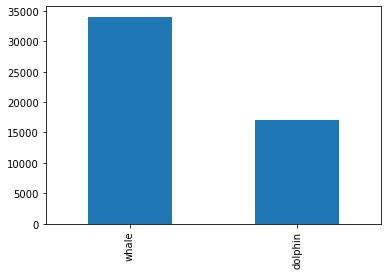

In [27]:
df_train['class'].value_counts().plot.bar()

In [28]:
df_train['class'].value_counts()

whale      34038
dolphin    16995
Name: class, dtype: int64

A rounghly 3:1 ratio in the training dataset for whales and dolphins, would this post any issue to classification?

In addtion, we can take a closer look of each of the specific species' distribution. Keep this information in mind when you are designing future algorithms

In [29]:
df_train.groupby(['class'])['species'].value_counts()

class    species                  
dolphin  bottlenose_dolphin           9664
         dusky_dolphin                3139
         spinner_dolphin              1700
         bottlenose_dolpin            1117
         spotted_dolphin               490
         common_dolphin                347
         white_sided_dolphin           229
         pantropic_spotted_dolphin     145
         commersons_dolphin             90
         rough_toothed_dolphin          60
         frasiers_dolphin               14
whale    beluga_whale                 7443
         humpback_whale               7392
         blue_whale                   4830
         false_killer_whale           3326
         melon_headed_whale           1689
         minke_whale                  1608
         killer_whale                 1493
         fin_whale                    1324
         gray_whale                   1123
         kiler_whale                   962
         southern_right_whale          866
         sei_whale 

**Why this is important?**

Simply by looking at the data, you might ask following questions:

1. Seems like bottlenose_dolphin, dusky_dolphin are dominating species in the world, is it true? Or we simply have biased dataset. Later when we deploy our system to where, for example, spinner_dolphin is dominiating, then our algorithm might under performance (These days we normally refer this issues as out of distribution(OOD) in the research field)

2. Should we design a two level model? First we identify if the image belongs to dolphin or whale, then we build separate system to identify their class ID.

3. Do test data have similar distribution?

You should come up with more questions by simply scanning the data, and build some test models to support or reject your hypotheis.Most importantly, you can talk to clients / domain experts / professors to gain more knowledge

# Let's look at our target

We have been so far checking minor things, and if you remember, our goal is not to predict class / species but their specific ID, in addtion, new individuals if we have not seen in them in training set. 

**Question**: how many targets we have?

In [30]:
df_train['individual_id'].unique(), len(df_train['individual_id'].unique())

(array(['cadddb1636b9', '1a71fbb72250', '60008f293a2b', ...,
        '3509cb6a8504', 'e880e47c06a4', 'bc6fcab946c4'], dtype=object),
 15587)

oops, seems like we need to build a system to predict 15587 + 1 classes (the plus one means new individual)

Instantly, we have a baseline here that if we guess in random, our system should have a baseline of **(1/15588)**% accuracy by random guessing

But there is something more scary, do each ID has similar distribution?

In [31]:
df_train['individual_id'].value_counts()

37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
               ... 
7da30c559ad2      1
882c59ba34bb      1
704e724a033f      1
08983c540e76      1
bc6fcab946c4      1
Name: individual_id, Length: 15587, dtype: int64

Here, the data distribution creats a significant issue, some of the ID only have 1 data in the entire training dataset, if we split them to validation set, we will expect our model will predict them as new individual (hopefully). But What if they appers in the testset (the competition are predicting on the testset)? You might then think what if we put them all in the training dataset, then there is no way we can evaluate our model performance on those IDs, because we can't put them in the validation set. 

In research literture, this is what we called **long tail** problem. And there is no simple solution to such problems, you will have to keep in mind when designing systems in the wild for such problems.

<AxesSubplot:ylabel='Density'>

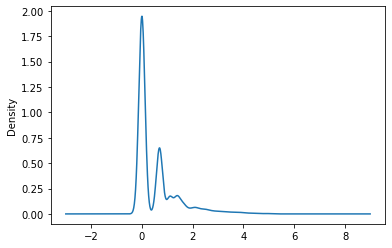

In [33]:
np.log(df_train['individual_id'].value_counts()).plot.kde()

Kernel density distribution with log scale, proofs that we do have a long tail problem

**Questions** How many id only have 1 data in our training dataset?

In [34]:
df_train['count'] = df_train.groupby('individual_id',as_index=False)['individual_id'].transform(lambda x: x.count())
df_train.head()

,image,species,individual_id,class,count
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,whale,1
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,whale,2
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,whale,64
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,dolphin,65
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,whale,50


In [35]:
df_train[df_train['count']==1]

,image,species,individual_id,class,count
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,whale,1
16,0018064338b499.jpg,blue_whale,4790ec346170,whale,1
17,001b0900f56e89.jpg,humpback_whale,bc14b5054353,whale,1
26,002618d6f63ebc.jpg,southern_right_whale,f5eab86405b4,whale,1
28,0029d877c29ab4.jpg,melon_headed_whale,c27f0a7f4e5a,whale,1
...,...,...,...,...,...
50988,ffbe97e98dc414.jpg,dusky_dolphin,dc6005ba4d2b,dolphin,1
51003,ffd233d91c41c7.jpg,dusky_dolphin,4de77853688d,dolphin,1
51005,ffda27396b72d3.jpg,melon_headed_whale,3509cb6a8504,whale,1
51012,ffe2cfd8177062.jpg,pilot_whale,e880e47c06a4,whale,1


In [36]:
print("new_whale or dolphin roughly: ", 9258/51033)

new_whale or dolphin roughly:  0.18141202751161015


We have 9258 out of 51033 data only have 1 sample, which means to the entire training datset, roughly 18% data are new individuals. (Because to the rest of the data, you have not seen those single IDs)

## One image is better than thousand words

We have been plotting tabular data for so long, and please remeber this is a computer vision class. Let's take a look of our data, by the end of day, visualization is the most selling point to any system

In [52]:
def plot_n_samples(species,row=5,path=PATH,folder='train_images',test=False):
    path = PATH + '/' + folder
    n = row * row
    if not test:
        df = df_train[df_train['species'] == species]
    else:
        df = df_test
    
    _,ax = plt.subplots(row,row,figsize=(16,12))
    
    
    for i in range(n):
        idx = np.random.randint(len(df))
        fname = df.iloc[idx]['image']
        if not test:
            label = df.iloc[idx]['individual_id']
        else: label = 'to pred'
        img = cv2.imread(path + '/' + fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i//row][i%row].imshow(img)
        ax[i//row][i%row].set_title(label + ' ,' + species)
        ax[i//row][i%row].axis('off')

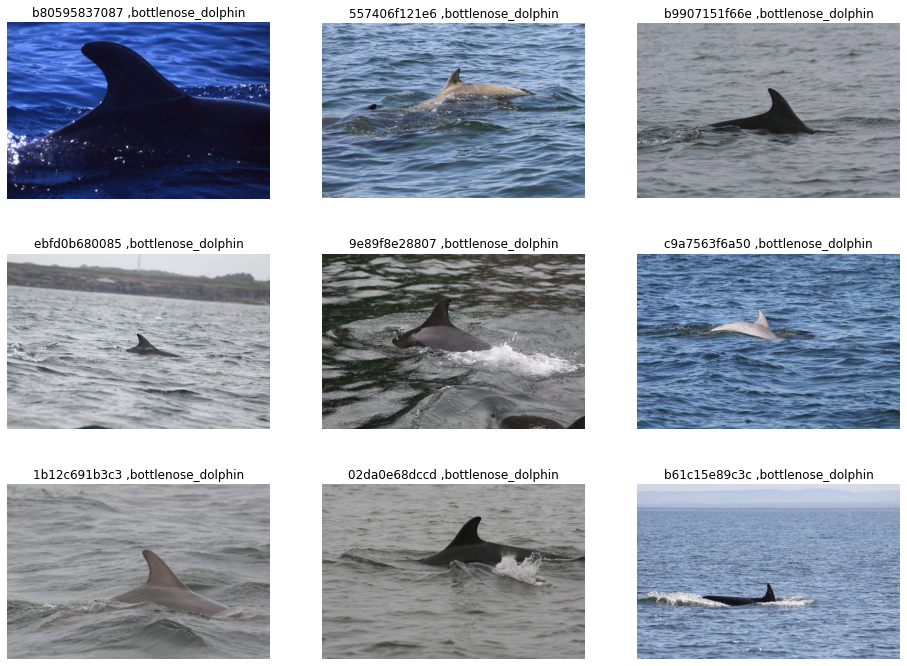

In [53]:
plot_n_samples('bottlenose_dolphin',3,folder='data/raw_data/train_images')

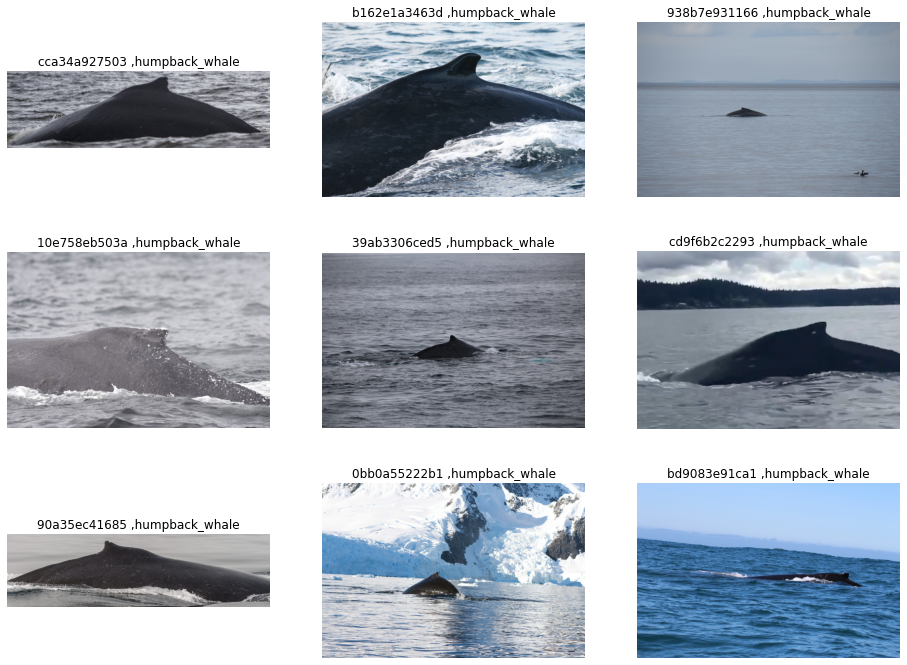

In [46]:
plot_n_samples('humpback_whale',3,folder='data/raw_data/train_images')

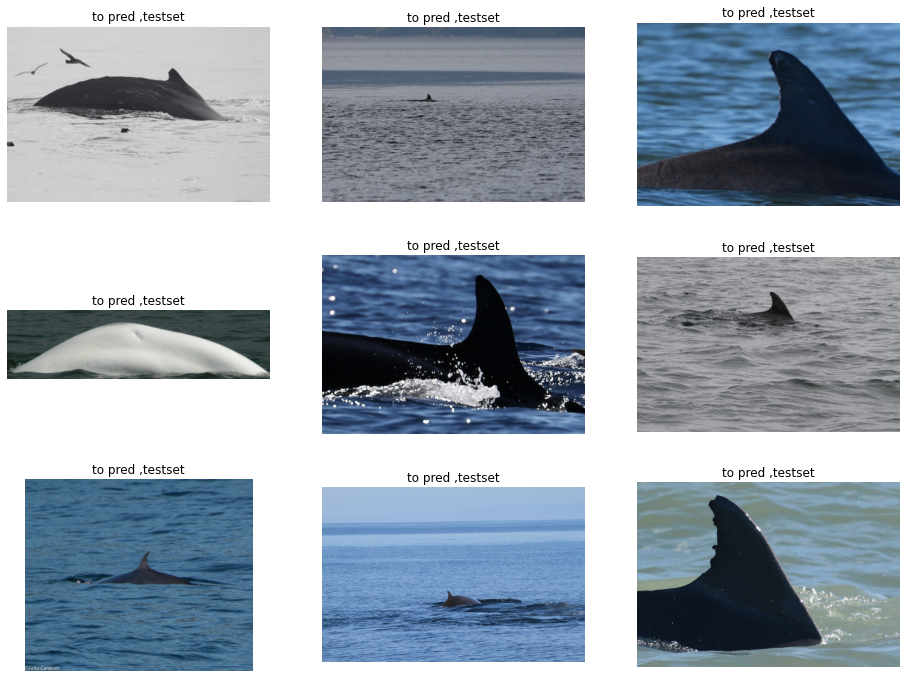

In [54]:
plot_n_samples('testset',3,folder='data/raw_data/test_images',test=True)

You can play more with the sample code, but here raise another probelm. It is clear that the input data have different scale (aka: width and height). How would you resize/crop the input data to fit your system? What data argumentation you need for train / test data?

Later we will provide a simple data argumentation pipeline, but you are encouraged to build your own data argumentation pipelines

# Last thing

One thing to stay on track in the kaggle competition is to do fast prototyping, which means you should quickly lay down a baseline to submit. 

Here we provide a simple baseline that just predict all test images are **new_individuals**. If you simply submit this baseline result, you end up with 0.112 in the public leaderboard, often referred by Kaggle community as (LB). 

As today (Feb 7th), this should give you rank 133/190 in the competition.

In [55]:
t_name = df_test['image'].tolist()
pred = ['new_individual new_individual new_individual new_individual new_individual']

In [56]:
result = {'image':[],'predictions': []}
for step, n in enumerate(t_name):
    print(step, end='\r')
    result['image'].extend([n])
    result['predictions'].extend(pred)

3818

8512

16913

24051

In [57]:
df_final = pd.DataFrame(result)
df_final.head()


,image,predictions
0,000110707af0ba.jpg,new_individual new_individual new_individual n...
1,0006287ec424cb.jpg,new_individual new_individual new_individual n...
2,000809ecb2ccad.jpg,new_individual new_individual new_individual n...
3,00098d1376dab2.jpg,new_individual new_individual new_individual n...
4,000b8d89c738bd.jpg,new_individual new_individual new_individual n...


Run the following cell to generate submission.csv file, and login to your kaggle account, head over to **submit prediction** to submit the csv file. Please note that you have to name the file as **submission.csv**, and format exactly same to what we have provided here. Otherwise will result submission failure. 

In [ ]:
# df_final.to_csv('submission.csv', index=False)

# Fin